In [1]:
import pandas as pd 
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [3]:
target = pd.read_csv('TARGET.csv')
target = target.drop(columns=['Unnamed: 0'])
explicativa = pd.read_csv('EXP.csv', sep=';')
explicativa = explicativa.drop(columns=['Unnamed: 0'])


In [4]:
target.head(5)

,VL_MED_FAM
0,0
1,0
2,0
3,0
4,100


In [5]:
explicativa

,SEXO_RESP_M,UF_Bahia,UF_Ceará,UF_Maranhão,UF_Paraíba,UF_Pernambuco,UF_Piauí,UF_Rio_Grande_do_Norte,UF_Sergipe,MESORREGIAO_MES2,...,ENSINO_Nenhum,ENSINO_PréVestibulareSuperior,RENDAS_S,QTD_COMODO_DOMIC_FAM,QTD_DORM_FAM,QTD_PESSOA,QTD_MASC,RENDA_PROV_TRAB_REG,PERIODO_MAX_TRAB_MEMB,MEDIA_IDADE
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,5.0,2.0,1,1,0,0.0,32
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,4.0,2.0,4,2,0,0.0,27
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,4.0,1.0,1,0,0,0.0,35
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1.0,1.0,2,1,0,0.0,10
4,1,0,0,1,0,0,0,0,0,0,...,0,0,1,5.0,3.0,5,3,0,0.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126249,1,1,0,0,0,0,0,0,0,0,...,0,0,0,6.0,3.0,1,1,0,0.0,66
126250,1,1,0,0,0,0,0,0,0,0,...,1,0,0,6.0,3.0,1,1,0,0.0,74
126251,1,1,0,0,0,0,0,0,0,0,...,0,0,0,3.0,2.0,2,1,0,0.0,67
126252,0,1,0,0,0,0,0,0,0,0,...,1,0,0,5.0,2.0,2,1,0,0.0,59


In [6]:
x_treino, x_teste, y_treino, y_teste = train_test_split (explicativa,
                                                         target,
                                                         test_size=0.3,
                                                         random_state=42)

x_treino.shape,x_teste.shape, y_treino.shape, y_teste.shape

((88377, 55), (37877, 55), (88377, 1), (37877, 1))

In [24]:
x_treino.columns

Index(['SEXO_RESP_M', 'UF_Bahia', 'UF_Ceará', 'UF_Maranhão', 'UF_Paraíba',
       'UF_Pernambuco', 'UF_Piauí', 'UF_Rio_Grande_do_Norte', 'UF_Sergipe',
       'MESORREGIAO_MES2', 'MESORREGIAO_MES3', 'MESORREGIAO_MES4',
       'MESORREGIAO_MES5', 'MESORREGIAO_MES6', 'MESORREGIAO_MES7',
       'MESORREGIAO_MES8', 'LOCAL_DOM_FAM_Urbana', 'MAT_PISO_FAMILIA_Cimento',
       'MAT_PISO_FAMILIA_Outro_Material', 'MATERIA_CONSTRUCAO_CAT_A',
       'AGUA_ENCANADA_Sim', 'ABASTECIMENTO_Demais',
       'ABASTECIMENTO_Rede_geral_de_distribuição', 'TEM_BANHEIRO_Sim',
       'ESCOAMENTO_SANITARIO_Fossa_séptica',
       'ESCOAMENTO_SANITARIO_Não_identificado',
       'ESCOAMENTO_SANITARIO_Outro_Meio',
       'ESCOAMENTO_SANITARIO_Rede_coletora_de_esgoto_ou_pluvial',
       'DESTINO_LIXO_É_coletado_diretamente',
       'DESTINO_LIXO_É_coletado_indiretamente',
       'DESTINO_LIXO_É_queimado_ou_enterrado_na_propriedade',
       'CALCAMENTO_Parcial', 'CALCAMENTO_Total', 'CLASSE_CIDADE_Outros',
       'CLASS

### Seleciona variável
##### procurando variáveis interessantes para o modelo 

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE #recursive feature eliminate
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

In [26]:
best_select = SelectKBest(chi2, k=5)
best_select.fit(explicativa, target)
chi_select = best_select.get_support()

In [27]:
rfe_sel =  RFE(estimator=LinearRegression(fit_intercept=True),
                   step=10,
                   n_features_to_select=5)
rfe_sel.fit(explicativa,target)
log_sel = rfe_sel.get_support()

In [28]:
rfr = SelectFromModel(RandomForestRegressor(random_state=42, n_estimators=100))
rfr_sel = rfr.fit(explicativa, target)
rfr_select = rfr_sel.get_support()

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\feature_selection\_from_model.py:224: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [29]:
chi_select, log_sel, rfr_select 

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,
        False, False,  True, False, False, False, False,  True,  True,
         True]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
         True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,
         True, False,  True, False, False,  True, False, False, False,
        False]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, 

In [31]:
col = explicativa.columns
col[chi_select], col[log_sel], col[rfr_select]

(Index(['TM_BF_1', 'RENDAS_S', 'RENDA_PROV_TRAB_REG', 'PERIODO_MAX_TRAB_MEMB',
        'MEDIA_IDADE'],
       dtype='object'),
 Index(['MAT_PISO_FAMILIA_Outro_Material', 'TM_BF_1', 'ENSINO_Nenhum',
        'RENDAS_S', 'QTD_PESSOA'],
       dtype='object'),
 Index(['TM_BF_1', 'RENDAS_S', 'QTD_PESSOA', 'RENDA_PROV_TRAB_REG',
        'PERIODO_MAX_TRAB_MEMB', 'MEDIA_IDADE'],
       dtype='object'))

## other 

In [9]:
var_sel = x_treino[['TM_BF_1',
'RENDAS_S',
'RENDA_PROV_TRAB_REG',
'PERIODO_MAX_TRAB_MEMB',
'MEDIA_IDADE',
'ENSINO_Medio',
'ENSINO_NAO_INFORMADO',
'ENSINO_Nenhum',
'ENSINO_PréVestibulareSuperior',
'QTD_PESSOA' ,
'MAT_PISO_FAMILIA_Cimento',
'MAT_PISO_FAMILIA_Outro_Material',]]

In [13]:
bost = GradientBoostingRegressor(random_state=42,verbose=2, criterion='mae',max_depth=10,n_estimators=100)
train = bost.fit(var_sel,y_treino)

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


      Iter       Train Loss   Remaining Time 
         1      134573.5796          347.17m
         2      113880.5846          351.04m
         3       97174.8581          347.66m
         4       83686.9782          346.95m
         5       72819.8702          341.09m
         6       64003.7092          335.85m
         7       56872.0735          331.23m
         8       51108.3497          329.22m
         9       46484.0032          326.84m
        10       42745.7886          324.57m
        11       39727.2868          320.82m
        12       37299.8484          325.71m
        13       35344.7490          331.18m
        14       33759.8275          324.82m
        15       32490.2248          315.49m
        16       31466.7989          306.99m
        17       30648.0513          299.24m
        18       29984.3700          291.76m
        19       29463.5509          284.76m
        20       29033.6267          278.59m
        21       28685.9976          272.64m
        2

In [22]:
import joblib
joblib.dump(train,
           'boost.pkl',
            compress = 1)

['boost.pkl']

In [15]:
pred = train.predict(var_sel)

In [16]:
train.score(var_sel,y_treino)

0.8355308434401063

In [18]:
predall = train.predict(var_sel)
dadosall = pd.DataFrame()
dadosall['pred'] = predall.tolist()
dadosall['real'] = y_treino.VL_MED_FAM.tolist()
dadosall['residuo'] = dadosall.real - dadosall.pred
dadosall.head()

,pred,real,residuo
0,0.009673,0,-0.009673
1,953.984334,477,-476.984334
2,377.094040,381,3.905960
3,13.517945,13,-0.517945
4,953.984334,954,0.015666


In [23]:
var_selteste = x_teste[['TM_BF_1',
'RENDAS_S',
'RENDA_PROV_TRAB_REG',
'PERIODO_MAX_TRAB_MEMB',
'MEDIA_IDADE',
'ENSINO_Medio',
'ENSINO_NAO_INFORMADO',
'ENSINO_Nenhum',
'ENSINO_PréVestibulareSuperior',
'QTD_PESSOA' ,
'MAT_PISO_FAMILIA_Cimento',
'MAT_PISO_FAMILIA_Outro_Material',]]

In [28]:
predteste = train.predict(var_selteste)
dadosalltst = pd.DataFrame()
dadosalltst['pred'] = predteste.tolist()
dadosalltst['real'] = y_teste.VL_MED_FAM.tolist()
dadosalltst['residuo'] = dadosalltst.real - dadosalltst.pred
dadosalltst.head()


,pred,real,residuo
0,48.927419,62,13.072581
1,-0.063128,0,0.063128
2,477.935078,477,-0.935078
3,311.510340,484,172.489660
4,198.197413,190,-8.197413


In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_array
print(mean_absolute_error(dadosall.real,dadosall.pred),mean_absolute_error(dadosalltst.real,dadosalltst.pred))


53.60168329509472 59.46973630475239


In [35]:
print('{} , {}'.format(train.score(var_sel,y_treino), train.score(var_selteste, y_teste)))

0.8355308434401063 , 0.8182918328023583


(array([6.0000e+00, 4.7700e+02, 2.3000e+01, 9.0700e+02, 1.1160e+03,
        5.1590e+03, 7.5479e+04, 2.5610e+03, 1.4890e+03, 3.0400e+02,
        1.6700e+02, 5.9600e+02, 3.6000e+01, 1.7000e+01, 1.5000e+01,
        1.8000e+01, 6.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-1200.98591941, -1008.21331156,  -815.44070371,  -622.66809586,
         -429.89548802,  -237.12288017,   -44.35027232,   148.42233553,
          341.19494338,   533.96755123,   726.74015908,   919.51276693,
         1112.28537478,  1305.05798263,  1497.83059048,  1690.60319833,
         1883.37580618,  2076.14841403,  2268.92102188,  2461.69362972,
         2654.46623757]),
 <a list of 20 Patch objects>)

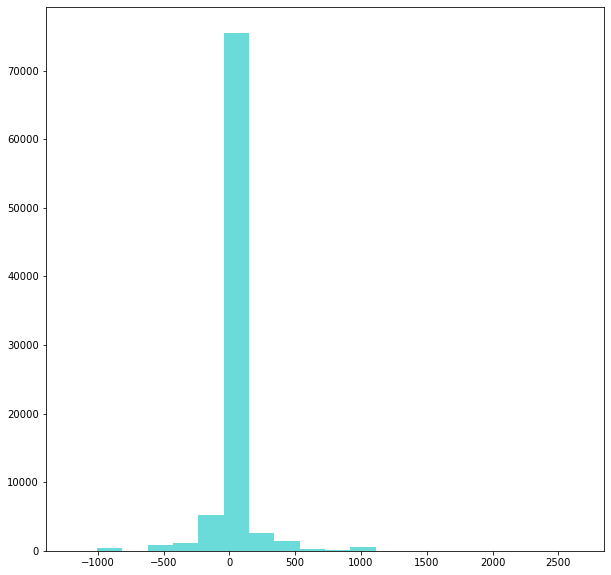

In [37]:
import matplotlib.pyplot as plt 
plt.subplots(1,1,figsize=(10,10))
plt.hist(dadosall.residuo, color='#6ADBD9', bins=20)